### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf



In [2]:
#  Import and read the CDC_data.csv.
import pandas as pd 
df = pd.read_csv("CDC_data.csv")
df

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,501","1,571",NaN
1,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,720","5,937",NaN
2,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,918","15,534",NaN
3,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"37,069","38,520",NaN
4,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"81,678","84,660",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534055,02/19/2023,10/01/2022,10/31/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
534056,02/19/2023,11/01/2022,11/30/2022,By Month,"2,022",11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
534057,02/19/2023,12/01/2022,12/31/2022,By Month,"2,022",12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,167.0,167.0,NaN
534058,02/19/2023,01/01/2023,01/31/2023,By Month,"2,023",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,154.0,154.0,NaN


In [3]:
df.dtypes


Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                   object
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths        object
Number of Mentions     object
Flag                   object
dtype: object

In [4]:
byyear_df = df.loc[(df['Group'] == "By Year")]
byyear_df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62095,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0,NaN
62096,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,629","1,629",NaN
62097,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,645","1,645",NaN
62098,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"2,346","2,346",NaN


In [5]:
byyear_df.isna().sum()

Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                      0
Month                 49680
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
Flag                  38375
dtype: int64

In [6]:
byyear_df=byyear_df.drop('Month', axis=1)
byyear_df

,Data As Of,Start Date,End Date,Group,Year,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62095,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0,NaN
62096,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,629","1,629",NaN
62097,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,645","1,645",NaN
62098,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"2,346","2,346",NaN


In [7]:
byyear_df.isna().sum()


Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                      0
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
Flag                  38375
dtype: int64

In [8]:
byyear_df=byyear_df.drop(byyear_df[['Data As Of','Start Date','End Date','Group','ICD10_codes','Flag']], axis=1)
byyear_df

,Year,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Respiratory diseases,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Respiratory diseases,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Respiratory diseases,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Respiratory diseases,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Respiratory diseases,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...,...
62095,"2,023",Puerto Rico,COVID-19,COVID-19,Not stated,0,0
62096,"2,020",Puerto Rico,COVID-19,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,COVID-19,All Ages,"2,346","2,346"


In [9]:
byyear_df.isna().sum()

Year                      0
State                     0
Condition Group           0
Condition                 0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
dtype: int64

In [10]:
byyear_nona_df = byyear_df.dropna()
byyear_nona_df

,Year,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Respiratory diseases,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Respiratory diseases,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Respiratory diseases,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Respiratory diseases,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Respiratory diseases,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...,...
62095,"2,023",Puerto Rico,COVID-19,COVID-19,Not stated,0,0
62096,"2,020",Puerto Rico,COVID-19,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,COVID-19,All Ages,"2,346","2,346"


In [11]:
byyear_nona_df.isna().sum()

Year                  0
State                 0
Condition Group       0
Condition             0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

In [12]:
byyear_nona_df=byyear_nona_df.drop('Condition Group',axis=1)
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...
62095,"2,023",Puerto Rico,COVID-19,Not stated,0,0
62096,"2,020",Puerto Rico,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,All Ages,"2,346","2,346"


In [13]:
# Determine the number of unique values in each column.
byyear_nona_df.nunique()

Year                     4
State                   54
Condition               23
Age Group               10
COVID-19 Deaths       2675
Number of Mentions    2792
dtype: int64

In [14]:
# Look at CONDITION_TYPE value counts for binning

condition_count = byyear_nona_df.Condition.value_counts()
condition_count

COVID-19                                                                     1898
Vascular and unspecified dementia                                            1848
All other conditions and causes (residual)                                   1833
Alzheimer disease                                                            1806
Influenza and pneumonia                                                      1798
Respiratory failure                                                          1773
Hypertensive diseases                                                        1742
Ischemic heart disease                                                       1711
Diabetes                                                                     1681
Renal failure                                                                1665
Chronic lower respiratory diseases                                           1642
Cardiac arrhythmia                                                           1633
Heart failure   

<AxesSubplot:ylabel='Density'>

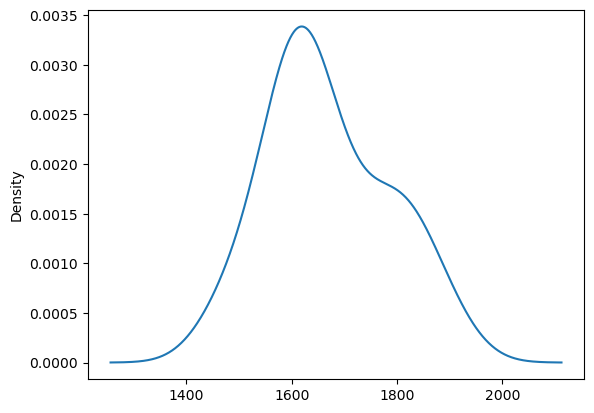

In [15]:
# Visualize the value counts of APPLICATION_TYPE

condition_count.plot.density()

In [16]:
byyear_nona_df.dtypes


Year                  object
State                 object
Condition             object
Age Group             object
COVID-19 Deaths       object
Number of Mentions    object
dtype: object

In [17]:
byyear_nona_df = byyear_nona_df.loc[(df['Age Group'] != "Not stated")]
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...
62091,"2,023",Puerto Rico,COVID-19,85+,91,91
62096,"2,020",Puerto Rico,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,All Ages,"2,346","2,346"


In [18]:
# agegrp_count = byyear_nona_df.Age Group.value_counts()
# agegrp_count


In [19]:
byyear_nona_df = byyear_nona_df.loc[(df['Age Group'] != "All Ages")]
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...
62087,"2,023",Puerto Rico,COVID-19,75-84,47,47
62088,"2,020",Puerto Rico,COVID-19,85+,333,333
62089,"2,021",Puerto Rico,COVID-19,85+,267,267
62090,"2,022",Puerto Rico,COVID-19,85+,882,882


In [20]:
byyear_nona_df.dtypes

Year                  object
State                 object
Condition             object
Age Group             object
COVID-19 Deaths       object
Number of Mentions    object
dtype: object

In [21]:
byyear_nona_df.isna().sum()

Year                  0
State                 0
Condition             0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

In [22]:
import numpy as np
byyear_nona_df['COVID-19 Deaths'] = df['COVID-19 Deaths'].str.replace(',','').astype(np.float64)

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
byyear_nona_df.dtypes


Year                   object
State                  object
Condition              object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions     object
dtype: object

In [24]:
byyear_nona_df = byyear_nona_df.drop('Number of Mentions',axis=1)
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths
12420,"2,020",United States,Influenza and pneumonia,0-24,249.0
12421,"2,021",United States,Influenza and pneumonia,0-24,893.0
12422,"2,022",United States,Influenza and pneumonia,0-24,350.0
12423,"2,023",United States,Influenza and pneumonia,0-24,9.0
12424,"2,020",United States,Influenza and pneumonia,25-34,1112.0
...,...,...,...,...,...
62087,"2,023",Puerto Rico,COVID-19,75-84,47.0
62088,"2,020",Puerto Rico,COVID-19,85+,333.0
62089,"2,021",Puerto Rico,COVID-19,85+,267.0
62090,"2,022",Puerto Rico,COVID-19,85+,882.0


In [7]:
# # Determine which values to replace if counts are less than ...?

# replace_application = list(application_count[application_count < 500].index)

# # Replace in dataframe
# for app in replace_application:
#     application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# # Check to make sure binning was successful
# application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# # Look at CLASSIFICATION value counts for binning
# classification_count = application_df.CLASSIFICATION.value_counts()
# classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [25]:
# Look at income-amt value counts for binning
age_count = byyear_nona_df.Condition.value_counts()
age_count

COVID-19                                                                     1485
Vascular and unspecified dementia                                            1428
All other conditions and causes (residual)                                   1414
Alzheimer disease                                                            1397
Influenza and pneumonia                                                      1380
Respiratory failure                                                          1352
Hypertensive diseases                                                        1326
Ischemic heart disease                                                       1295
Diabetes                                                                     1264
Renal failure                                                                1251
Chronic lower respiratory diseases                                           1223
Adult respiratory distress syndrome                                          1214
Cardiac arrhythm

In [26]:
byyear_nona_df.nunique()

Year                  4
State                54
Condition            23
Age Group             8
COVID-19 Deaths    1949
dtype: int64

In [27]:
# Generate our categorical variable lists

covid_cat = byyear_nona_df.dtypes[byyear_nona_df.dtypes == "object"].index.tolist()
covid_cat

['Year', 'State', 'Condition', 'Age Group']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(byyear_nona_df[covid_cat]))

In [29]:
encode_df 

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(covid_cat)
encode_df

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths
12420,"2,020",United States,Influenza and pneumonia,0-24,249.0
12421,"2,021",United States,Influenza and pneumonia,0-24,893.0
12422,"2,022",United States,Influenza and pneumonia,0-24,350.0
12423,"2,023",United States,Influenza and pneumonia,0-24,9.0
12424,"2,020",United States,Influenza and pneumonia,25-34,1112.0
...,...,...,...,...,...
62087,"2,023",Puerto Rico,COVID-19,75-84,47.0
62088,"2,020",Puerto Rico,COVID-19,85+,333.0
62089,"2,021",Puerto Rico,COVID-19,85+,267.0
62090,"2,022",Puerto Rico,COVID-19,85+,882.0


In [43]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(byyear_nona_df[covid_cat]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(covid_cat)
# encode_df.head()

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
encode_df

,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths
12420,"2,020",United States,Influenza and pneumonia,0-24,249.0
12421,"2,021",United States,Influenza and pneumonia,0-24,893.0
12422,"2,022",United States,Influenza and pneumonia,0-24,350.0
12423,"2,023",United States,Influenza and pneumonia,0-24,9.0
12424,"2,020",United States,Influenza and pneumonia,25-34,1112.0
...,...,...,...,...,...
62087,"2,023",Puerto Rico,COVID-19,75-84,47.0
62088,"2,020",Puerto Rico,COVID-19,85+,333.0
62089,"2,021",Puerto Rico,COVID-19,85+,267.0
62090,"2,022",Puerto Rico,COVID-19,85+,882.0


In [34]:
byyear_nona_df = byyear_nona_df.merge(encode_df,left_index=True, right_index=True)
byyear_nona_df

,Year,State,Condition,Age Group,COVID-19 Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
12420,"2,020",United States,Influenza and pneumonia,0-24,249.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12421,"2,021",United States,Influenza and pneumonia,0-24,893.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12422,"2,022",United States,Influenza and pneumonia,0-24,350.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12423,"2,023",United States,Influenza and pneumonia,0-24,9.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12424,"2,020",United States,Influenza and pneumonia,25-34,1112.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28887,"2,023",Kansas,"Intentional and unintentional injury, poisonin...",75-84,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28888,"2,020",Kansas,"Intentional and unintentional injury, poisonin...",85+,16.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28889,"2,021",Kansas,"Intentional and unintentional injury, poisonin...",85+,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28890,"2,022",Kansas,"Intentional and unintentional injury, poisonin...",85+,31.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
covid_cat

['Year', 'State', 'Condition', 'Age Group']

In [36]:
byyear_nona_df = byyear_nona_df.drop(covid_cat, axis=1)
byyear_nona_df

,COVID-19 Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
12420,249.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12421,893.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12422,350.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12423,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12424,1112.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28887,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28888,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28889,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28890,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
byyear_nona_df.dtypes

COVID-19 Deaths    float64
Year_2,020         float64
Year_2,021         float64
Year_2,022         float64
Year_2,023         float64
                    ...   
Age Group_45-54    float64
Age Group_55-64    float64
Age Group_65-74    float64
Age Group_75-84    float64
Age Group_85+      float64
Length: 90, dtype: object

In [38]:
byyear_nona_df.rename(columns = {'COVID-19 Deaths':'Deaths'}, inplace = True)
byyear_nona_df.columns

Index(['Deaths', 'Year_2,020', 'Year_2,021', 'Year_2,022', 'Year_2,023',
       'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_New York City', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Puerto Rico', 'State_Rhode Island', 'State_South Carolina',
       'State_South Dako

In [39]:
byyear_nona_df

,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
12420,249.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12421,893.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12422,350.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12423,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12424,1112.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28887,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28888,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28889,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28890,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
byyear_nona_df.rename(columns = {'COVID-19_Deaths':'Deaths'}, inplace = True)
byyear_nona_df.columns

Index(['Deaths', 'Year_2,020', 'Year_2,021', 'Year_2,022', 'Year_2,023',
       'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_New York City', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Puerto Rico', 'State_Rhode Island', 'State_South Carolina',
       'State_South Dako

In [46]:
byyear_nona_df['Deaths'] = byyear_nona_df['Deaths'].astype(int)
byyear_nona_df

,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,Age Group_0-24,Age Group_25-34,Age Group_35-44,Age Group_45-54,Age Group_55-64,Age Group_65-74,Age Group_75-84,Age Group_85+
12420,249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12421,893,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12422,350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12423,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12424,1112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28887,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28888,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28889,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28890,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
from sklearn.model_selection import train_test_split

# Split our preprocessed data into our features and target arrays
# use R

y = byyear_nona_df.Deaths.values
X = byyear_nona_df.drop(columns=["Deaths"]).values



In [48]:
y

array([249, 893, 350, ...,  30,  31,  11])

In [50]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [55]:
y_train

array([   0,    0, 1126, ..., 2485, 6790,    0])

In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compile, Train and Evaluate the Model - Optimize Trial - 1

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.262


In [58]:
len(X_train[0])

89

In [60]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=80

hidden_nodes_layer2 = 60

hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# Thired hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                7200      
                                                                 
 dense_1 (Dense)             (None, 60)                4860      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


In [61]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [63]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq= "epoch",
#     period=5
#     )




In [64]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
227/227 [==============================] - 1s 985us/step - loss: -147919.7031 - accuracy: 0.0028
Epoch 2/100
227/227 [==============================] - 0s 1ms/step - loss: -6670771.5000 - accuracy: 0.0017
Epoch 3/100
227/227 [==============================] - 0s 1ms/step - loss: -49646940.0000 - accuracy: 0.0017
Epoch 4/100
227/227 [==============================] - 0s 983us/step - loss: -182743168.0000 - accuracy: 0.0017
Epoch 5/100
227/227 [==============================] - 0s 1ms/step - loss: -463743840.0000 - accuracy: 0.0017
Epoch 6/100
227/227 [==============================] - 0s 1ms/step - loss: -971130944.0000 - accuracy: 0.0017
Epoch 7/100
227/227 [==============================] - 0s 1ms/step - loss: -1766080512.0000 - accuracy: 0.0017
Epoch 8/100
227/227 [==============================] - 0s 1ms/step - loss: -2929206784.0000 - accuracy: 0.0017
Epoch 9/100
227/227 [==============================] - 0s 1ms/step - loss: -4545553920.0000 - accuracy: 0.0017
Epoch 10/

227/227 [==============================] - 1s 3ms/step - loss: -4456631500800.0000 - accuracy: 0.0017
Epoch 74/100
227/227 [==============================] - 1s 3ms/step - loss: -4658709921792.0000 - accuracy: 0.0017
Epoch 75/100
227/227 [==============================] - 1s 3ms/step - loss: -4866185363456.0000 - accuracy: 0.0017
Epoch 76/100
227/227 [==============================] - 1s 3ms/step - loss: -5080089100288.0000 - accuracy: 0.0017
Epoch 77/100
227/227 [==============================] - 1s 3ms/step - loss: -5303109156864.0000 - accuracy: 0.0017
Epoch 78/100
227/227 [==============================] - 1s 3ms/step - loss: -5534035476480.0000 - accuracy: 0.0017
Epoch 79/100
227/227 [==============================] - 1s 3ms/step - loss: -5772677218304.0000 - accuracy: 0.0017
Epoch 80/100
227/227 [==============================] - 1s 4ms/step - loss: -6015983026176.0000 - accuracy: 0.0017
Epoch 81/100
227/227 [==============================] - 1s 3ms/step - loss: -6264419516416.00

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

76/76 - 0s - loss: -2.7735e+12 - accuracy: 4.1442e-04 - 156ms/epoch - 2ms/step
Loss: -2773540143104.0, Accuracy: 0.00041442186920903623


In [66]:
# Export our model to HDF5 file
# nn.save("AlphabetSoupCharity_Optimization.h5")

# Optimize trial # 2

In [67]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=80

hidden_nodes_layer2 = 60

hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="tanh"))

# Thired hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                7200      
                                                                 
 dense_5 (Dense)             (None, 60)                4860      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


In [68]:
# create checkpoint

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [69]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
227/227 [==============================] - 1s 957us/step - loss: -5044.9297 - accuracy: 0.0055
Epoch 2/100
227/227 [==============================] - 0s 995us/step - loss: -8474.9365 - accuracy: 0.0017
Epoch 3/100
227/227 [==============================] - 0s 993us/step - loss: -11189.4648 - accuracy: 0.0017
Epoch 4/100
227/227 [==============================] - 0s 1ms/step - loss: -13907.2334 - accuracy: 0.0017
Epoch 5/100
227/227 [==============================] - 0s 974us/step - loss: -16593.9434 - accuracy: 0.0017
Epoch 6/100
227/227 [==============================] - 0s 966us/step - loss: -19233.2246 - accuracy: 0.0017
Epoch 7/100
227/227 [==============================] - 0s 981us/step - loss: -21883.8281 - accuracy: 0.0017
Epoch 8/100
227/227 [==============================] - 0s 977us/step - loss: -24537.3750 - accuracy: 0.0017
Epoch 9/100
227/227 [==============================] - 0s 994us/step - loss: -27178.1172 - accuracy: 0.0017
Epoch 10/100
227/227 [==========

227/227 [==============================] - 1s 3ms/step - loss: -206459.5938 - accuracy: 0.0017
Epoch 78/100
227/227 [==============================] - 1s 3ms/step - loss: -208882.3281 - accuracy: 0.0017
Epoch 79/100
227/227 [==============================] - 1s 4ms/step - loss: -211349.9688 - accuracy: 0.0017
Epoch 80/100
227/227 [==============================] - 1s 3ms/step - loss: -213840.3281 - accuracy: 0.0017
Epoch 81/100
227/227 [==============================] - 1s 3ms/step - loss: -216366.1875 - accuracy: 0.0017
Epoch 82/100
227/227 [==============================] - 1s 3ms/step - loss: -218939.8438 - accuracy: 0.0017
Epoch 83/100
227/227 [==============================] - 1s 3ms/step - loss: -221475.6562 - accuracy: 0.0017
Epoch 84/100
227/227 [==============================] - 1s 3ms/step - loss: -224011.4531 - accuracy: 0.0017
Epoch 85/100
227/227 [==============================] - 1s 3ms/step - loss: -226572.9062 - accuracy: 0.0017
Epoch 86/100
227/227 [===================

In [71]:
# Evaluate the model using the test data ACTIVATION "tanh"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

76/76 - 0s - loss: -2.3521e+05 - accuracy: 0.0564 - 302ms/epoch - 4ms/step
Loss: -235214.375, Accuracy: 0.056361377239227295


#  Optimize Trial - 3

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=50

hidden_nodes_layer2 = 40

hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="sigmoid"))

# Thired hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="sigmoid"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                2200      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1230      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [74]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
227/227 [==============================] - 1s 1ms/step - loss: -268578.0625 - accuracy: 0.0017
Epoch 2/100
227/227 [==============================] - 0s 2ms/step - loss: -271398.6875 - accuracy: 0.0017
Epoch 3/100
227/227 [==============================] - 1s 3ms/step - loss: -274092.9062 - accuracy: 0.0017
Epoch 4/100
227/227 [==============================] - 1s 4ms/step - loss: -276745.6562 - accuracy: 0.0017
Epoch 5/100
227/227 [==============================] - 1s 4ms/step - loss: -279376.5625 - accuracy: 0.0017
Epoch 6/100
227/227 [==============================] - 1s 3ms/step - loss: -282018.9375 - accuracy: 0.0017
Epoch 7/100
227/227 [==============================] - 1s 3ms/step - loss: -284648.5625 - accuracy: 0.0017
Epoch 8/100
227/227 [==============================] - 1s 3ms/step - loss: -287302.4688 - accuracy: 0.0017
Epoch 9/100
227/227 [==============================] - 1s 3ms/step - loss: -289968.6562 - accuracy: 0.0017
Epoch 10/100
227/227 [===============

227/227 [==============================] - 1s 3ms/step - loss: -465867.9688 - accuracy: 0.0017
Epoch 77/100
227/227 [==============================] - 1s 3ms/step - loss: -468445.0000 - accuracy: 0.0017
Epoch 78/100
227/227 [==============================] - 1s 2ms/step - loss: -471027.7500 - accuracy: 0.0017
Epoch 79/100
227/227 [==============================] - 1s 2ms/step - loss: -473624.7188 - accuracy: 0.0017
Epoch 80/100
227/227 [==============================] - 1s 2ms/step - loss: -476202.7188 - accuracy: 0.0017
Epoch 81/100
227/227 [==============================] - 1s 2ms/step - loss: -478813.0625 - accuracy: 0.0017
Epoch 82/100
227/227 [==============================] - 1s 3ms/step - loss: -481438.3438 - accuracy: 0.0017
Epoch 83/100
227/227 [==============================] - 1s 2ms/step - loss: -484083.2812 - accuracy: 0.0017
Epoch 84/100
227/227 [==============================] - 1s 2ms/step - loss: -486717.3750 - accuracy: 0.0017
Epoch 85/100
227/227 [===================

In [75]:
# Evaluate the model using the test data ACTIVATION "sigmoid"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

76/76 - 0s - loss: -4.8751e+05 - accuracy: 0.0514 - 138ms/epoch - 2ms/step
Loss: -487507.65625, Accuracy: 0.05138831213116646


# Optimize Trial# 

In [76]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
nn_model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
227/227 [==============================] - 1s 821us/step - loss: -452.7004 - accuracy: 0.0794
Epoch 2/50
227/227 [==============================] - 0s 854us/step - loss: -2637.1455 - accuracy: 0.0347
Epoch 3/50
227/227 [==============================] - 0s 832us/step - loss: -7419.1118 - accuracy: 0.0238
Epoch 4/50
227/227 [==============================] - 0s 908us/step - loss: -15266.4561 - accuracy: 0.0181
Epoch 5/50
227/227 [==============================] - 0s 846us/step - loss: -26035.2363 - accuracy: 0.0144
Epoch 6/50
227/227 [==============================] - 0s 872us/step - loss: -39627.8633 - accuracy: 0.0105
Epoch 7/50
227/227 [==============================] - 0s 839us/step - loss: -56780.7109 - accuracy: 0.0073
Epoch 8/50
227/227 [==============================] - 0s 828us/step - loss: -76989.1250 - accuracy: 0.0061
Epoch 9/50
227/227 [==============================] - 0s 986us/step - loss: -99468.5234 - accuracy: 0.0046
Epoch 10/50
227/227 [====================

In [77]:
# Evaluate the model using the test data ACTIVATION "relu" + "sigmoid"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

76/76 - 0s - loss: -4.8751e+05 - accuracy: 0.0514 - 65ms/epoch - 861us/step
Loss: -487507.65625, Accuracy: 0.05138831213116646
